### Análisis de los logs de movimiento del motor y los datos de la cámara


In [12]:
import numpy as np
import pandas as pd
import time
from scipy  import stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm


In [50]:

df_name = r'C:\Users\inges\OneDrive - UDIT\src\photoneu\github\photoneu\photoneu\raspberryPi\logs'
df_name += r'\2025_06_19_02_56_49.log' #\2024_08_29_04_18_52.log'
#df_name += r'\2025_06_19_02_47_43.log'
#df_name += r'\2025_06_19_02_28_19.log'
#df_name += r'\2025_06_19_02_22_52.log'
#df_name += r'\2025_06_19_02_20_29.log'

df = pd.read_csv(df_name)

- t_motor, desde moveMotor() hasta llegar al SP.
- t_cam_1, desde llega al SP hasta que detecta que empieza a moverse.

In [35]:
df.columns

Index(['t_total', ' t_motor', ' t_cam_1', ' t_cam2', ' time_motor', 'motor_x',
       'motor_y', 'time_cam', 'cam_x', 'cam_y'],
      dtype='object')

In [36]:
df.head()

,t_total,t_motor,t_cam_1,t_cam2,time_motor,motor_x,motor_y,time_cam,cam_x,cam_y
0,2.685173,2.302432,0.372380,0.009060,1750335790835385755,6000,2000,1750335791207763239,124,9
1,12.769467,2.452827,10.296962,0.012941,1750335793677826475,6000,14000,1750335803974793338,124,141
2,0.897031,0.690094,0.196099,0.002238,1750335804687736761,2000,14000,1750335804883832790,167,140
3,63.853965,1.634559,62.212680,0.005417,1750335806522345950,2000,22000,1750335868735025765,166,224
4,2.042289,1.830303,0.207057,0.003123,1750335870574626962,10000,14000,1750335870781646318,80,142


Depende el retardo de la distancia de movimiento?


In [51]:

df['distancia'] = np.sqrt((df['motor_x'] - df['motor_x'].shift(1))**2 + (df['motor_y'] - df['motor_y'].shift(1))**2)

# Reemplazar NaN por 0 o cualquier valor que se prefiera para la primera observación
df['distancia'].fillna(0, inplace=True)

C:\Users\inges\AppData\Local\Temp\ipykernel_644\311498946.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['distancia'].fillna(0, inplace=True)


In [52]:
df["t_cam"] = df[" t_cam_1"] + df[" t_cam2"]

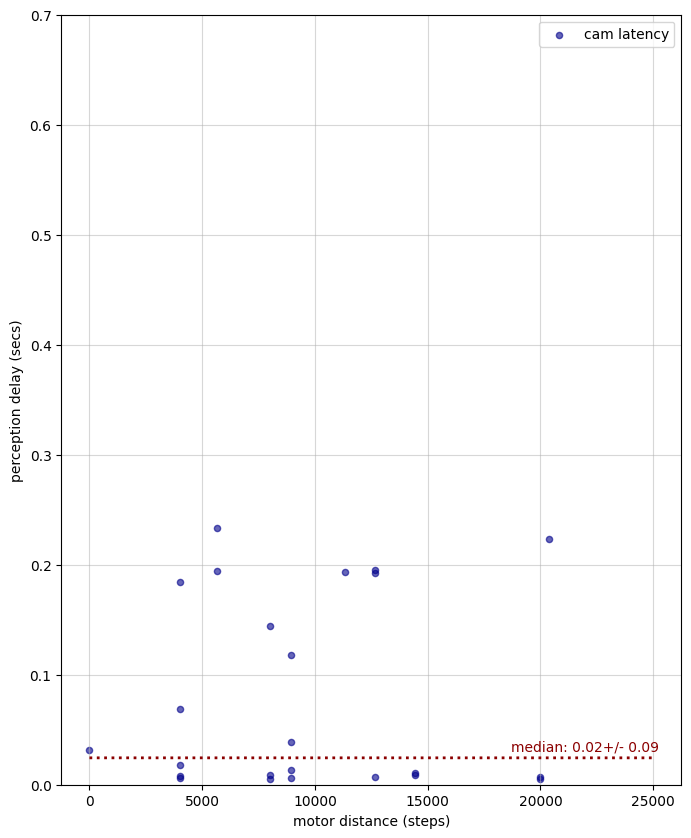

In [92]:
m = df['t_cam'].median()
s = df['t_cam'].std()

ax1 = df.plot(kind="scatter", x="distancia", y="t_cam", marker="o", \
                    color = "DarkBlue", label="cam latency", \
                    alpha = 0.6, figsize=(8,10))
ax1.grid(which='both')
# Or if you want different settings for the grids:
ax1.grid(which='minor', alpha=0.2)
ax1.grid(which='major', alpha=0.5)
#plt.title("Cam Lantency vs Motor movement Distance")
l = m*np.ones(25000)
plt.plot(l, linestyle = 'dotted', linewidth=2, color='darkred')
plt.text(22000, m + 0.01, 'median: ' + f'{m:.2f}'+ "+/- " + f'{s:.2f}' , ha='center', va='center', color='darkred', fontsize=10)
plt.ylim(0, 0.7)
plt.ylabel("perception delay (secs)")
plt.xlabel("motor distance (steps)")
plt.show()

Nos fijamos en t_cam

0.08785498580204468


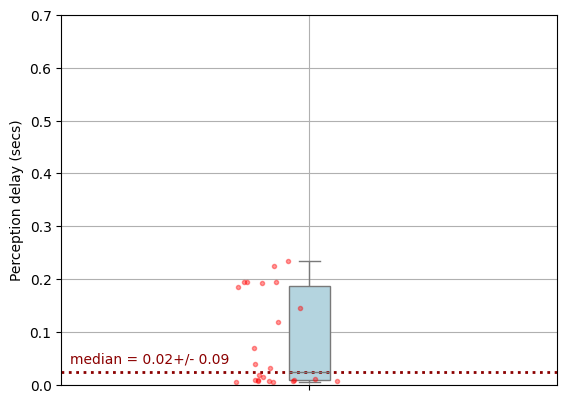

In [88]:

m = df['t_cam'].median()
s = df['t_cam'].std()
x = np.random.normal(-0.04,0.04,size=len(df['t_cam']))

print(s)
plt.figure()
sns.boxplot(df['t_cam'],fill=True, width=0.05,color="lightblue", fliersize=0)
#sns.violinplot(df['t_cam'],fill=True)
plt.text(x = -0.29, y = 0.04, s="median = " + f'{m:.2f}'+ "+/- " + f'{s:.2f}', fontsize=10, color='darkred')
#plt.text(x = 0.05, y = 2.2, s=f"std = {s:.2f}" )
plt.hlines(m, -0.3, 0.3, colors='darkred', linestyles='dotted', linewidth=2)
plt.xlim(-0.3,0.3)
plt.ylim(0,0.7)
plt.plot(x, df['t_cam'], 'r.', alpha=0.4)
#plt.title('Mediana de número de ratones detectados por imagen.')
plt.ylabel('Perception delay (secs)')

plt.grid(True)
plt.show()


array([[<Axes: title={'center': 't_total'}>,
        <Axes: title={'center': ' t_motor'}>,
        <Axes: title={'center': ' t_cam_1'}>],
       [<Axes: title={'center': ' t_cam2'}>,
        <Axes: title={'center': ' time_motor'}>,
        <Axes: title={'center': 'motor_x'}>],
       [<Axes: title={'center': 'motor_y'}>,
        <Axes: title={'center': 'time_cam'}>,
        <Axes: title={'center': 'cam_x'}>],
       [<Axes: title={'center': 'cam_y'}>,
        <Axes: title={'center': 'distancia'}>,
        <Axes: title={'center': 't_cam'}>]], dtype=object)

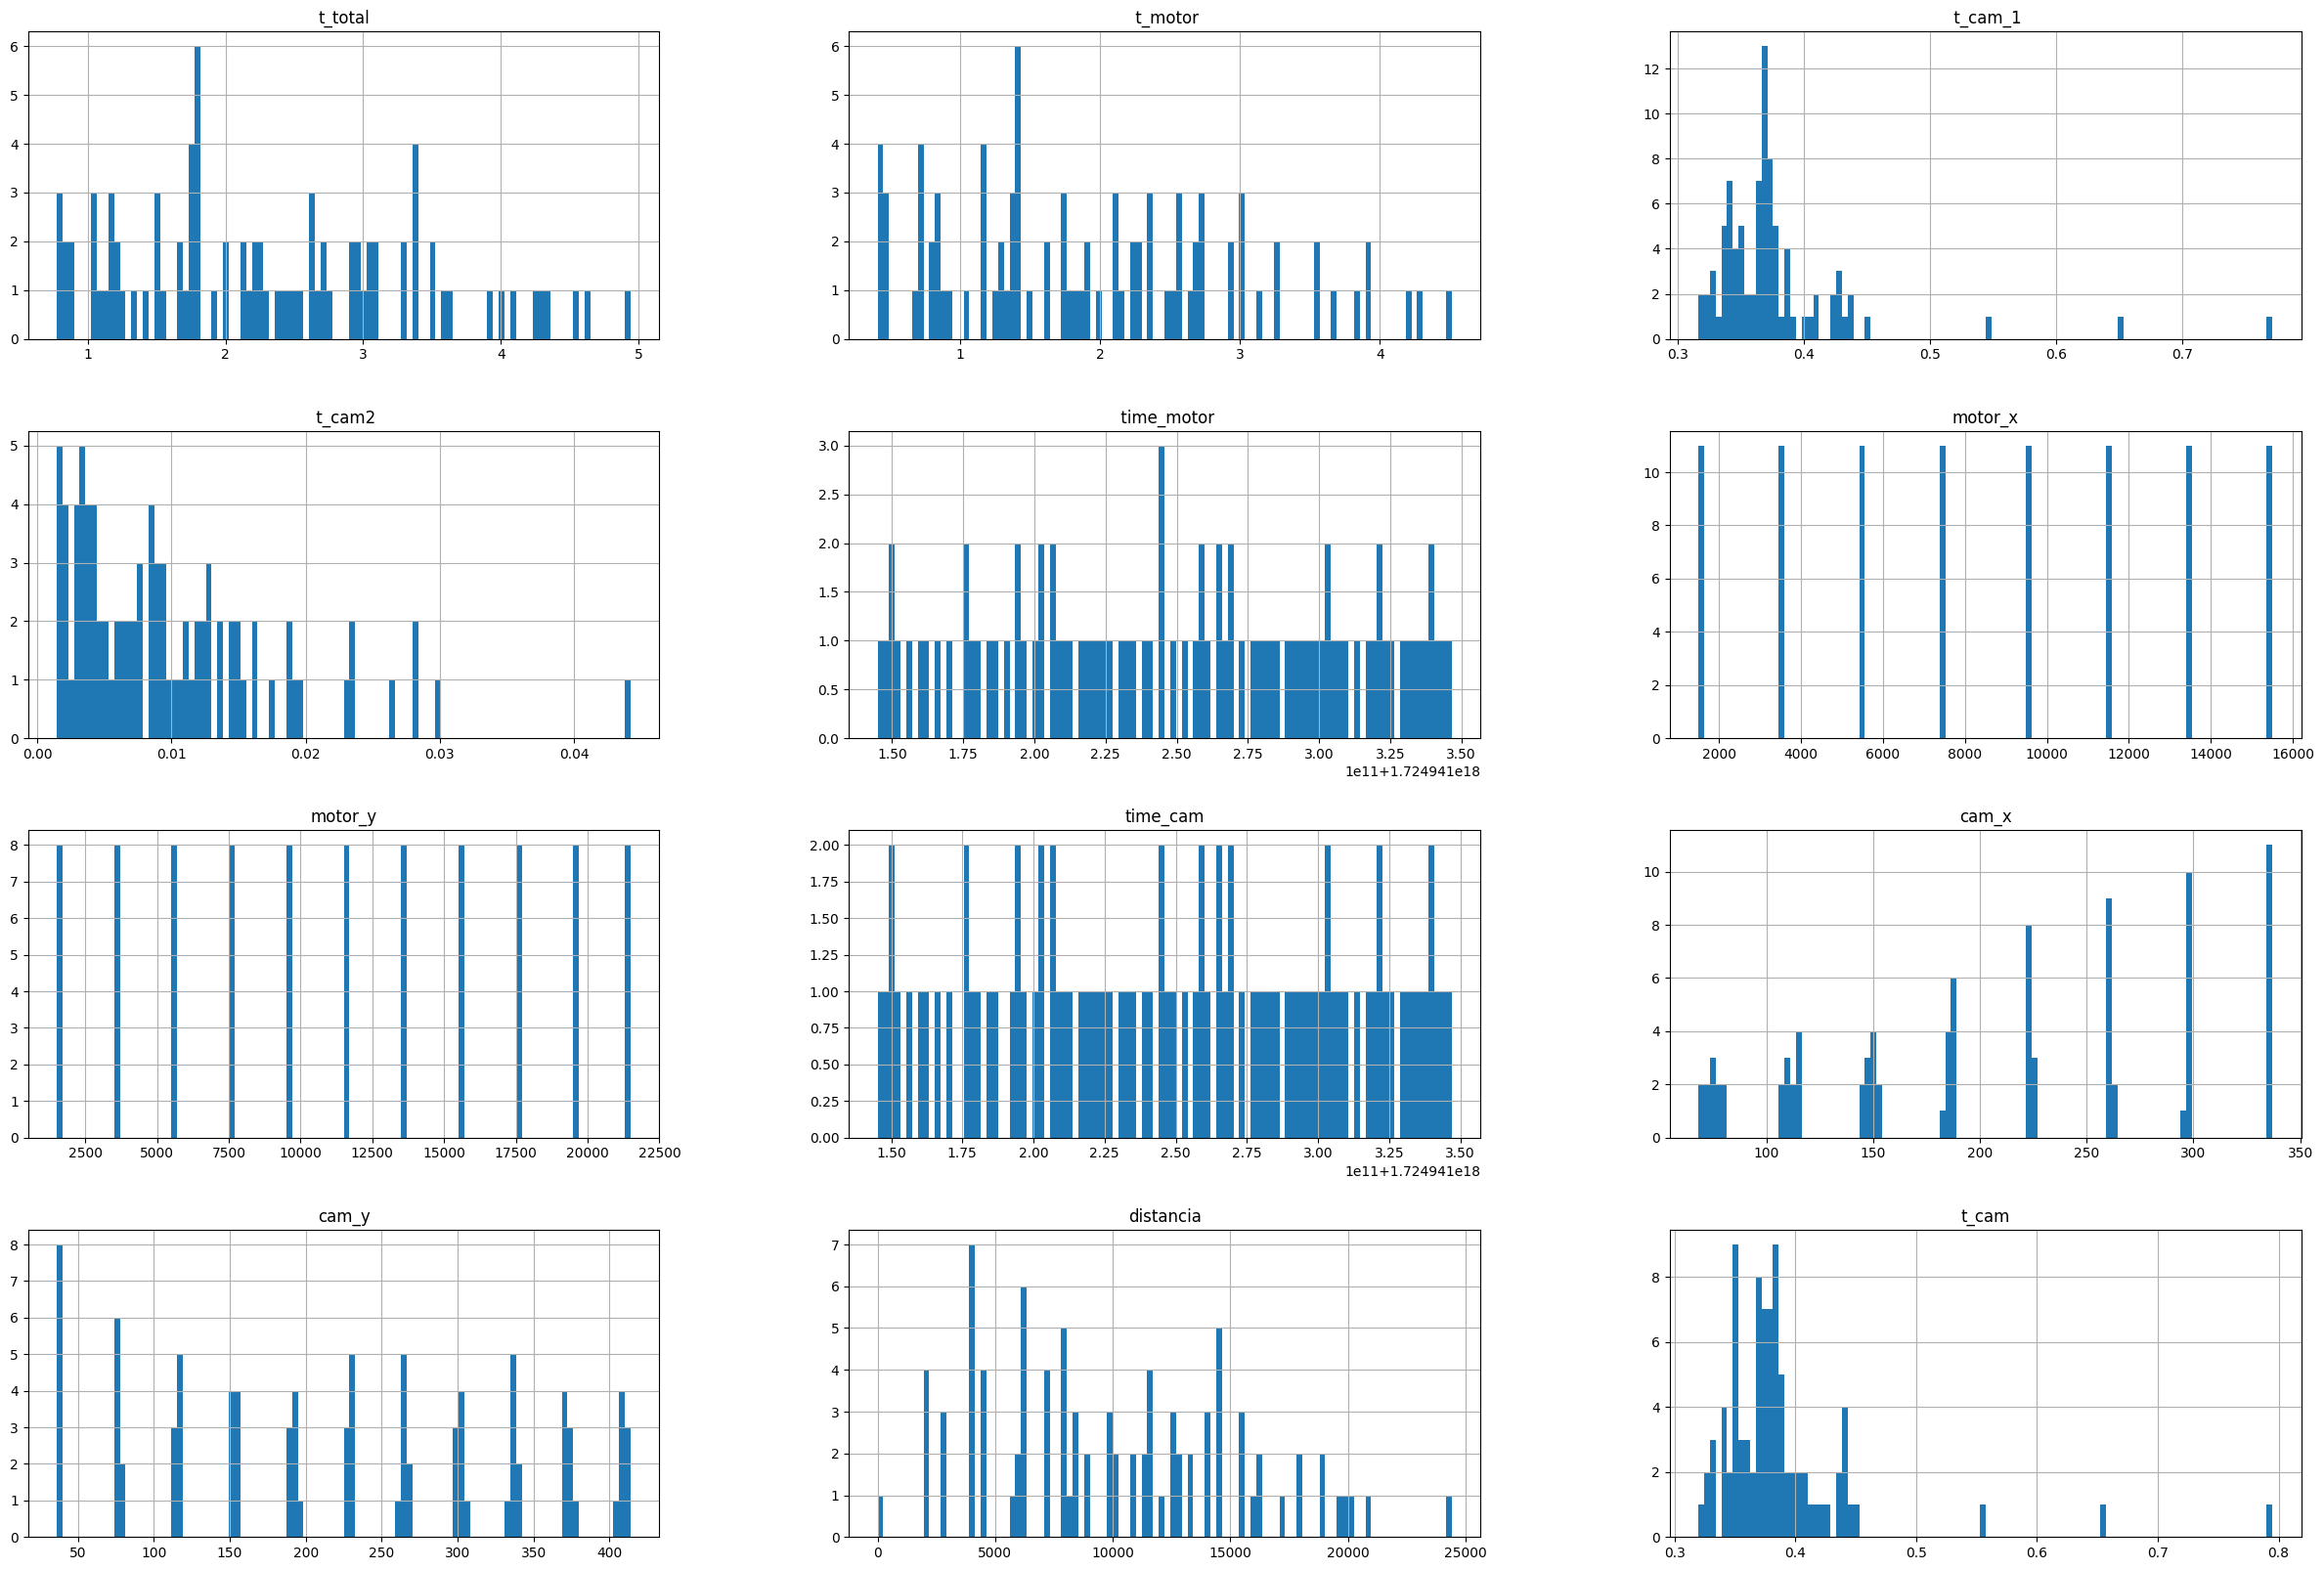

In [15]:
df.hist(bins=100, figsize=(30,20))

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
t_total,88.0,2.329320e+00,1.043772e+00,7.752205e-01,1.513832e+00,2.198412e+00,3.043943e+00,4.941572e+00
t_motor,88.0,1.939436e+00,1.034843e+00,4.098393e-01,1.168244e+00,1.792769e+00,2.664633e+00,4.511668e+00
t_cam_1,88.0,3.774839e-01,6.248356e-02,3.160087e-01,3.458911e-01,3.678401e-01,3.788814e-01,7.711856e-01
t_cam2,88.0,9.946455e-03,7.816563e-03,1.455105e-03,3.808187e-03,8.488282e-03,1.310111e-02,4.422354e-02
time_motor,88.0,1.724941e+18,5.887393e+10,1.724941e+18,1.724941e+18,1.724941e+18,1.724941e+18,1.724941e+18
motor_x,88.0,8.500000e+03,4.608837e+03,1.500000e+03,5.000000e+03,8.500000e+03,1.200000e+04,1.550000e+04
motor_y,88.0,1.150000e+04,6.360799e+03,1.500000e+03,5.500000e+03,1.150000e+04,1.750000e+04,2.150000e+04
time_cam,88.0,1.724941e+18,5.887721e+10,1.724941e+18,1.724941e+18,1.724941e+18,1.724941e+18,1.724941e+18
cam_x,88.0,2.049773e+02,8.588324e+01,6.800000e+01,1.377500e+02,2.055000e+02,2.705000e+02,3.370000e+02
cam_y,88.0,2.263523e+02,1.180454e+02,3.600000e+01,1.167500e+02,2.290000e+02,3.350000e+02,4.140000e+02


In [17]:
#df['t_cam'].mean()
df['t_cam'].describe()

count    88.000000
mean      0.387430
std       0.063419
min       0.319680
25%       0.355278
50%       0.376429
75%       0.391922
max       0.794868
Name: t_cam, dtype: float64

<Axes: >

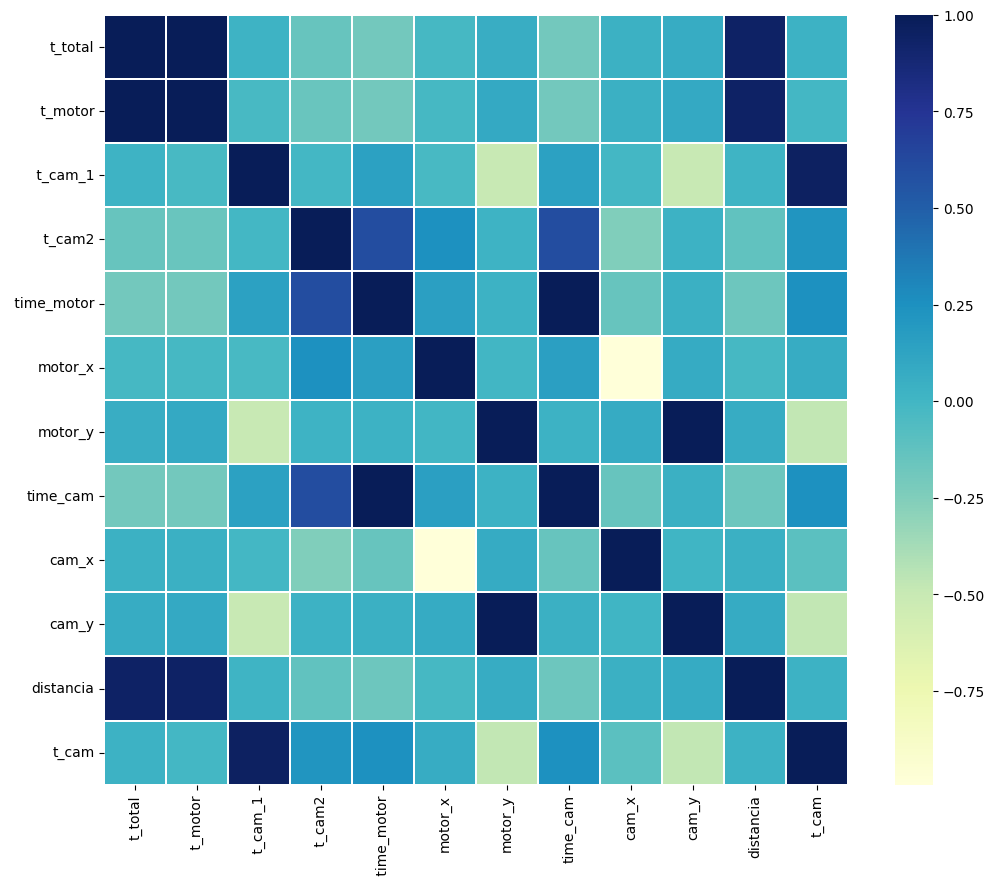

In [19]:
corrmat = df.corr(method='spearman',numeric_only=True)
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidths=0.1)

c:\Users\inges\OneDrive - UDIT\src\photoneu\.conda\lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


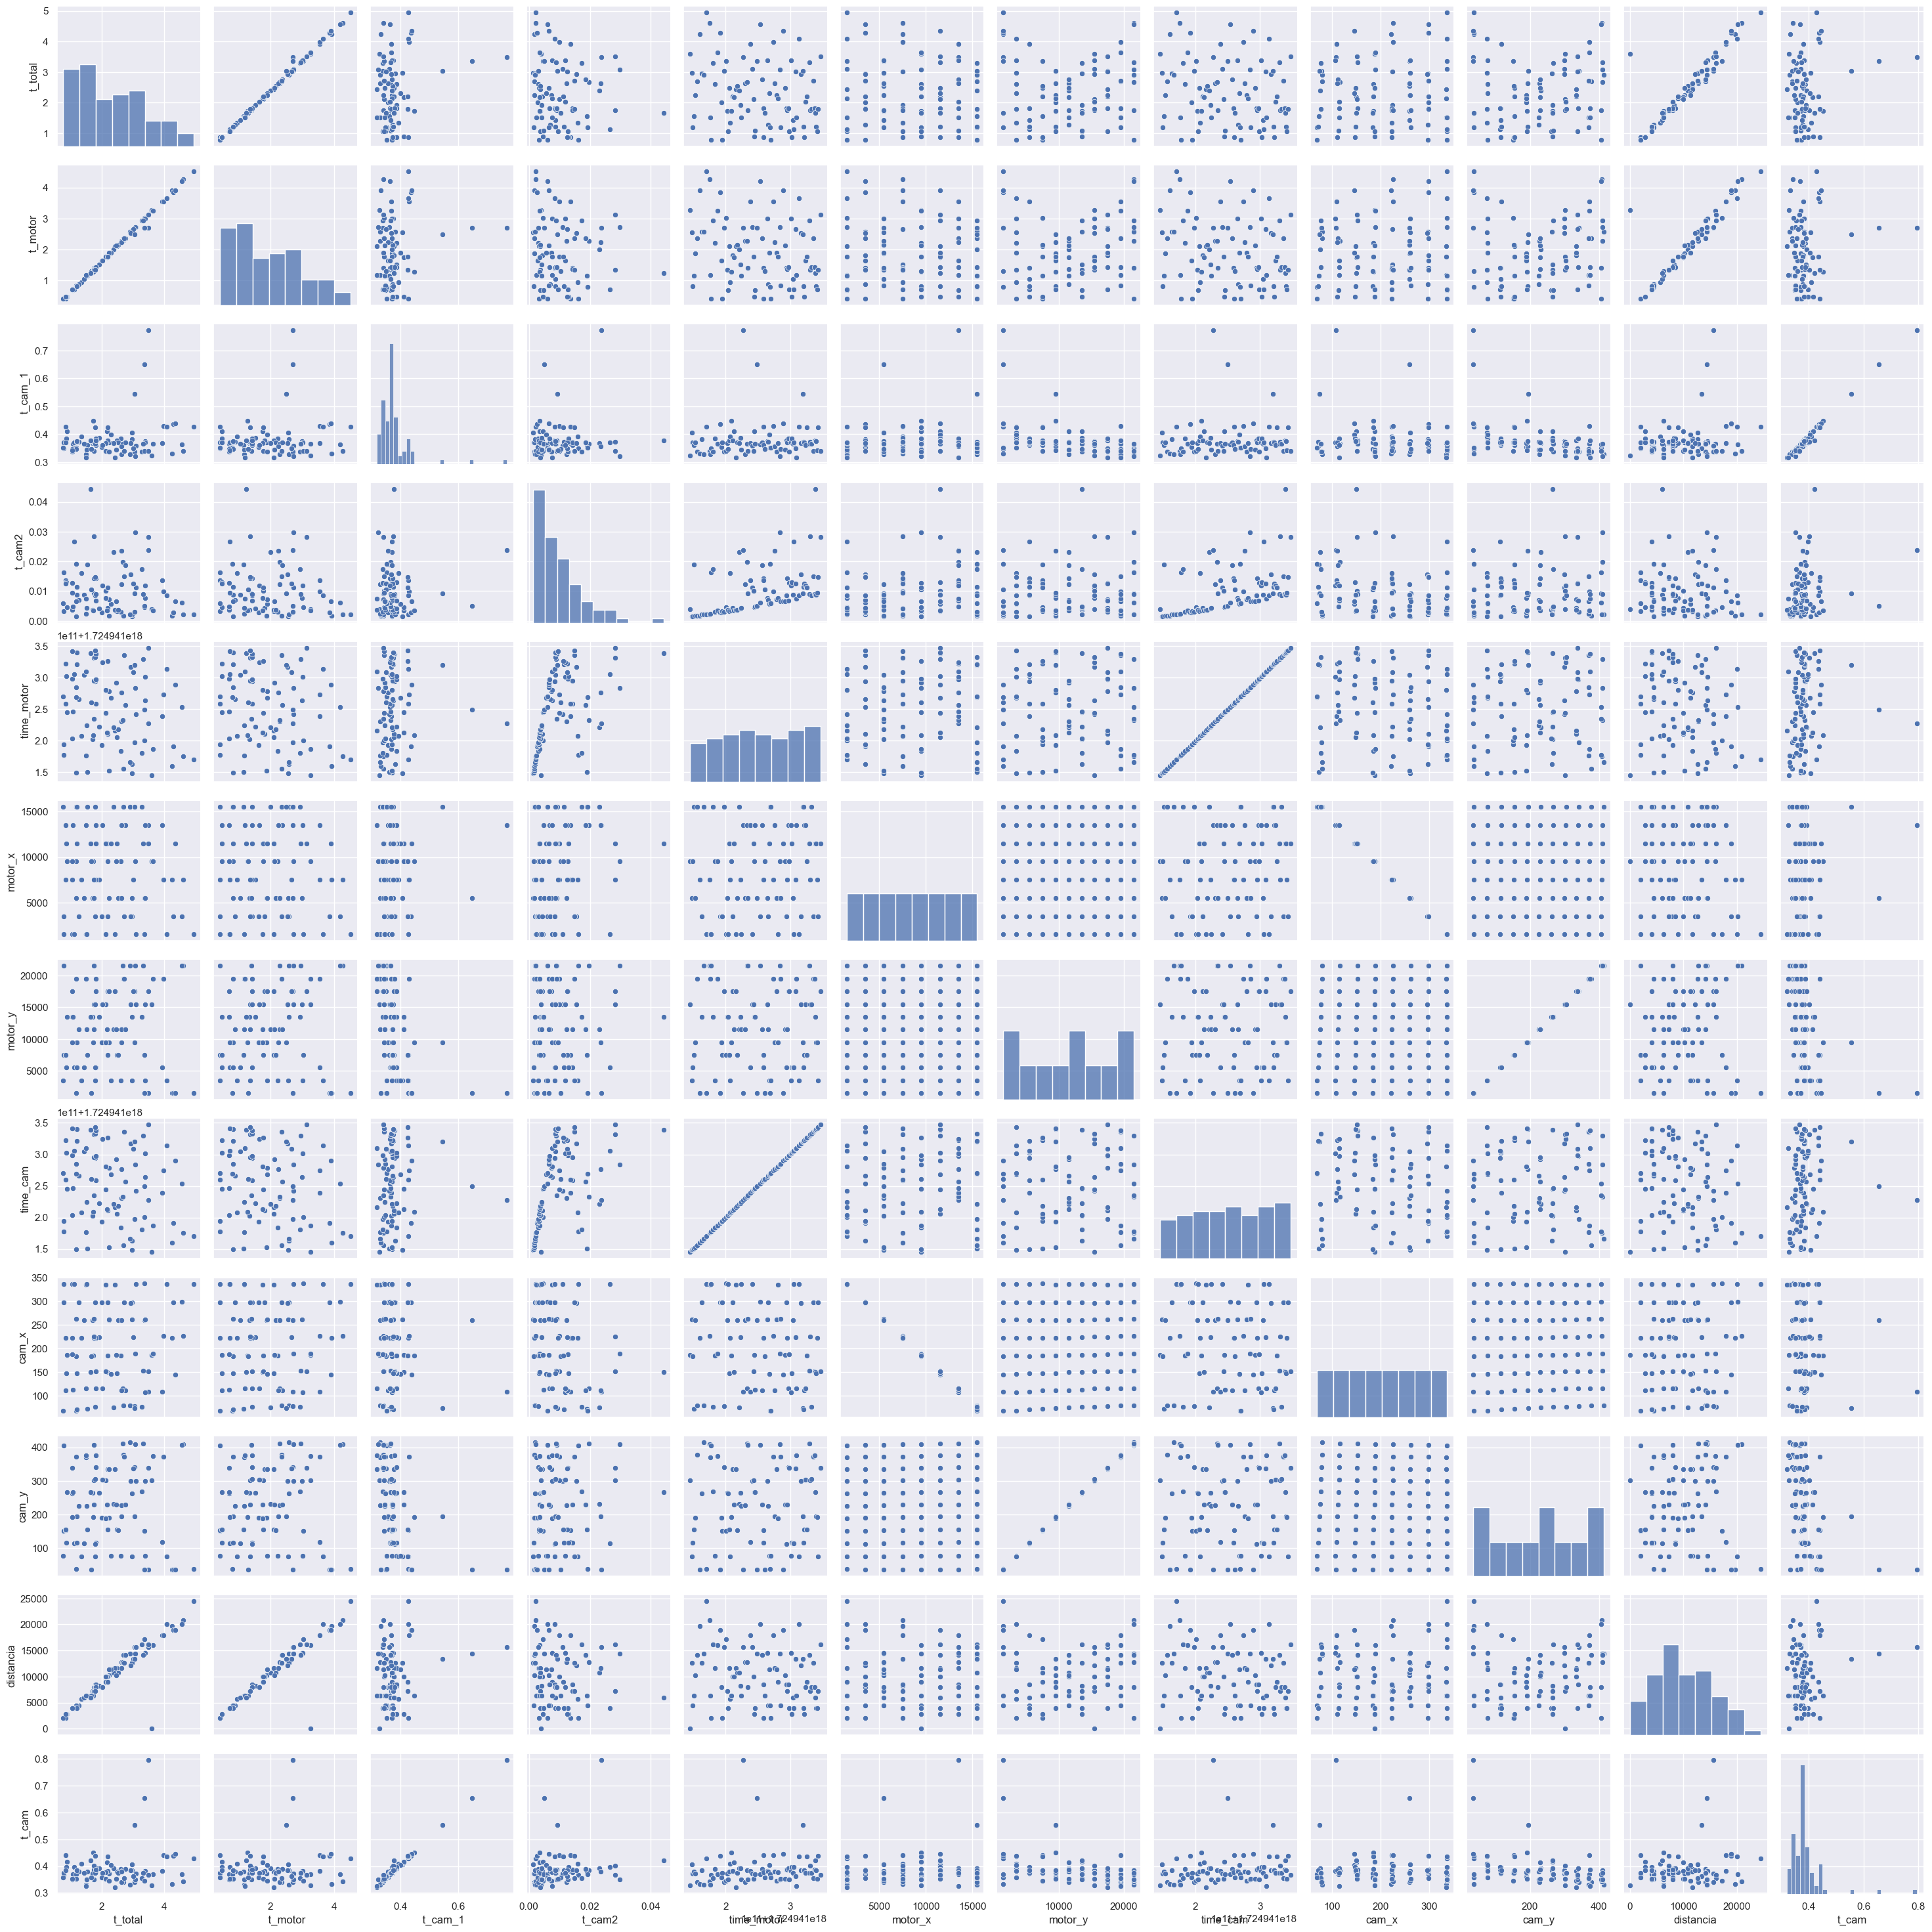

In [20]:
sns.set()
cols = df.columns
sns.pairplot(df[cols], size = 2.5)
plt.show()

c:\Users\inges\OneDrive - UDIT\src\photoneu\.conda\lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


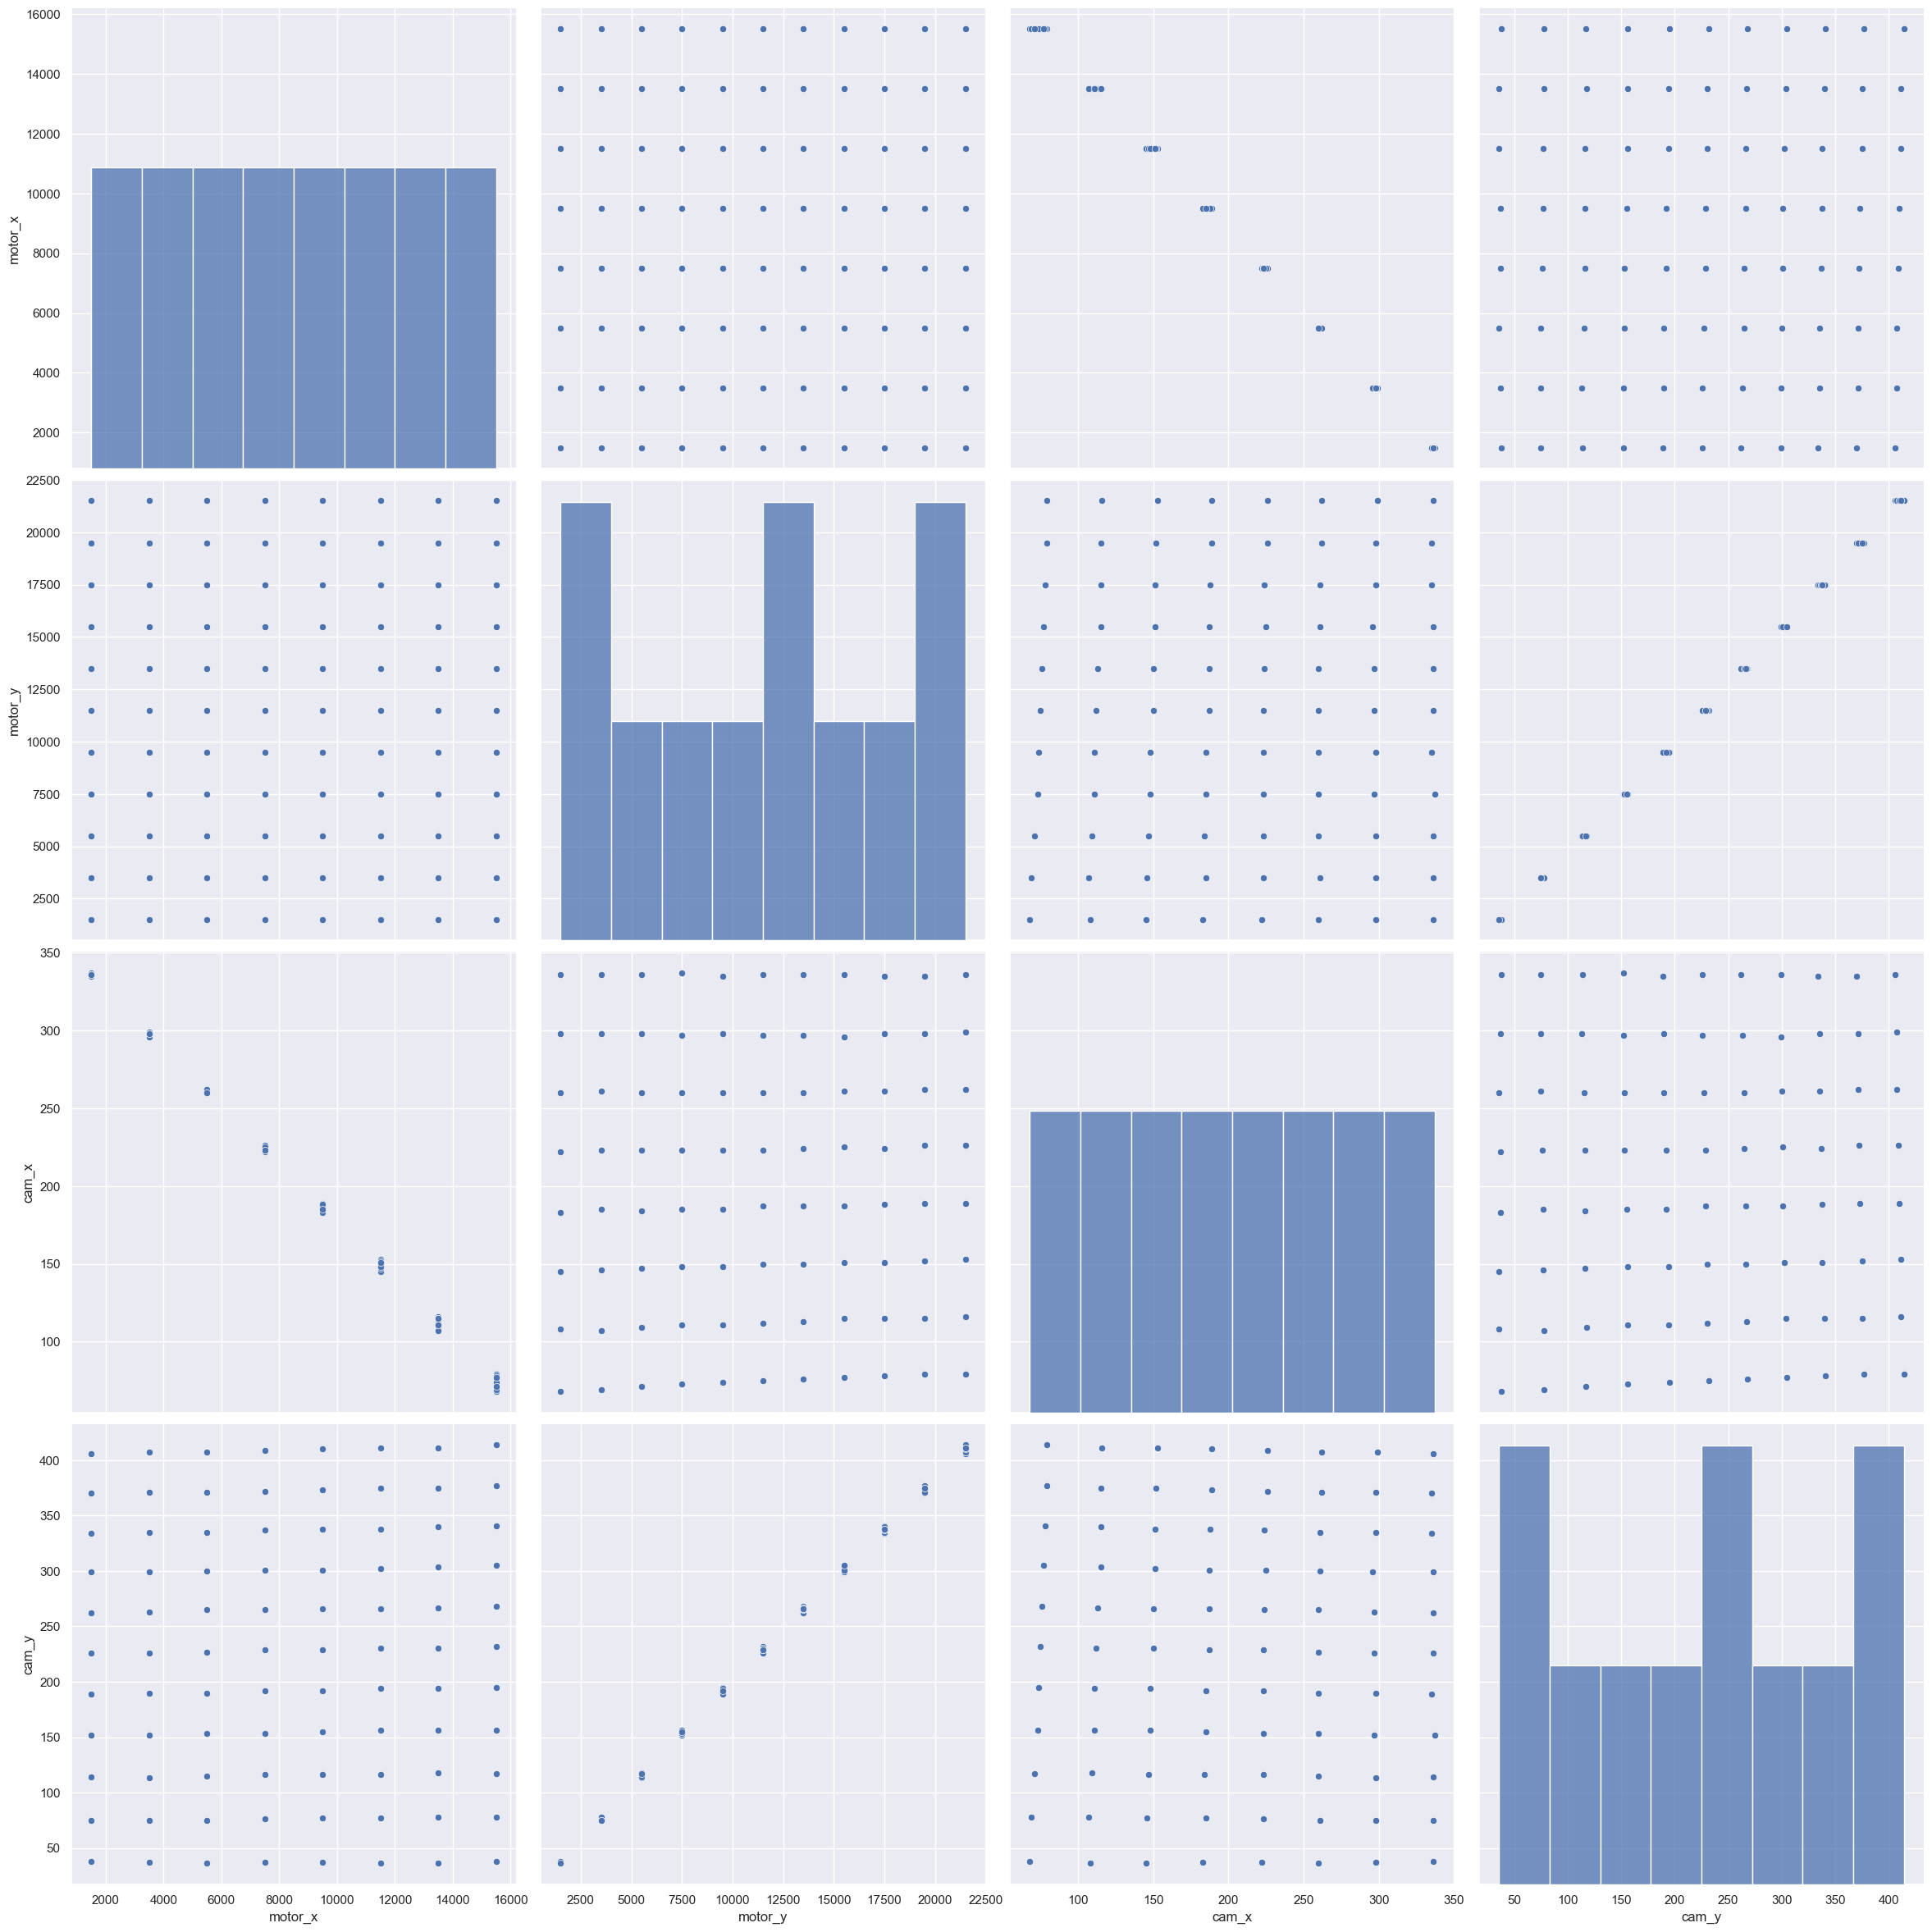

In [23]:
sns.set()
cols = ['motor_x', 'motor_y','cam_x', 'cam_y']
sns.pairplot(df[cols], size = 6)
plt.show()

In [ ]:
sns.set()
cols = ['motor_x', 'motor_y','cam_x', 'cam_y']
sns.pairplot(df[cols], size = 6)
plt.show()